In [1]:
import tensorflow as tf
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
IMAGE_FEATURES = 28*28

In [5]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_FEATURES * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_FEATURES)
        return data

In [6]:
train_data = extract_data('data/train-images-idx3-ubyte.gz', 60000)
test_data = extract_data('data/t10k-images-idx3-ubyte.gz', 10000)

In [7]:
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

In [8]:
label_dict = {0: 'T-shirt/top',
                1: 'Trouser',
                2: 'Pullover',
                3: 'Dress',
                4: 'Coat',
                5: 'Sandal',
                6: 'Shirt',
                7: 'Sneaker',
                8: 'Bag',
                9: 'Ankle boot'}

In [9]:
def display_image(image_pixels):
    plt.imshow(image_pixels.reshape((28, 28)), cmap='gray')

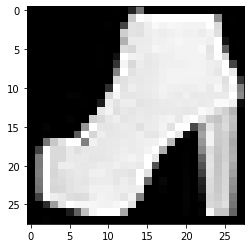

In [10]:
display_image(train_data[44])

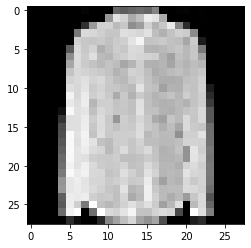

In [11]:
display_image(test_data[44])

In [12]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [14]:
BATCH_SIZE = 128
EPOCHS = 10

input_img = Input(shape=(IMAGE_FEATURES,))

In [15]:
def autoencoder(input_img):
    encoding1 = Dense(units=784, activation='relu')(input_img)
    encoding2 = Dense(units=256, activation='relu')(encoding1)
    codings = Dense(units=64, activation='relu')(encoding2)
    decoding2 = Dense(units=256, activation='relu')(codings)
    decoding1 = Dense(units=784, activation='relu')(decoding2)
    return decoding1

In [16]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')

In [17]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               201488    
Total params: 1,050,976
Trainable params: 1,050,976
Non-trainable params: 0
___________________________________________________

In [18]:
history = autoencoder.fit(train_data, train_data,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            verbose=1,
                            validation_data=(train_data, train_data))

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.0329 - val_loss: 0.0212
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0197 - val_loss: 0.0186
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0181 - val_loss: 0.0175
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0173 - val_loss: 0.0170
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0165 - val_loss: 0.0165
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0161 - val_loss: 0.0158
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0158 - val_loss: 0.0156
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0156 - val_loss: 0.0155
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0153 - val_lo

In [19]:
pred = autoencoder.predict(test_data)
pred.shape

(10000, 784)

Original Images


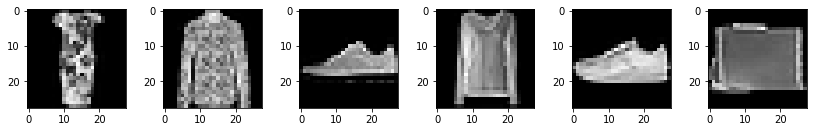

Reconstructed Images


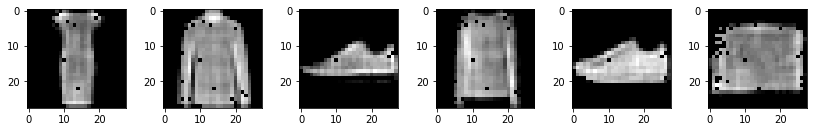

In [20]:
plt.figure(figsize=(24, 4))
print('Original Images')
pos = 0
for i in range(100, 106):
    plt.subplot(2, 10, pos+1)
    img = test_data[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos += 1
plt.show()

plt.figure(figsize=(24, 4))
print('Reconstructed Images')
pos = 0
for i in range(100, 106):
    plt.subplot(2, 10, pos+1)
    img = pred[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    pos += 1
plt.show()